In [8]:
!pip install ace_tools

In [2]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import ast
import csv
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
path = "/content/neuron_contribution_between_class (2).csv"
df = pd.read_csv(path, encoding="utf-8-sig")
df.head()

,Unnamed: 0,type,layer,class1,class2,Neuron_ID,Contribution
0,0,mlp,7,math,programming,6117,8.144039e+11
1,1,mlp,24,math,programming,9329,7.782393e+11
2,2,mlp,23,math,programming,10184,7.565522e+11
3,3,res,1,math,programming,12054,6.470184e+11
4,4,mlp,24,math,programming,282,5.486137e+11


# Get neuron explanation

In [ ]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import ast
import csv
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

path = "./dot_product/neuron_contribution_between_class.csv"
df = pd.read_csv(path, encoding="utf-8-sig")
df.head()


import requests

def get_feature(model_id, source, index):
    try:
        url = f"https://www.neuronpedia.org/api/feature/{model_id}/{source}/{index}"
        resp = requests.get(url)
        resp.raise_for_status()            # throws if not 200
        feature = resp.json()

        # 2. Grab the list of explanations (might be empty!)
        explanations = feature.get("explanations", [])

        # 3. first description:
        # if explanations:
        return explanations[0]["description"]
    except e:
        return None

for i in range(10):
    model = "gemma-2-2b"
    layer = 21
    sae_type = "mlp"
    source = f"{layer}-gemmascope-{sae_type}-16k"
    feat = get_feature(model, source, i)
    print(feat)

model = "gemma-2-2b"

break

explanations = []

for idx, row in df.iterrows():
    sae_type = df["type"]
    layer = df["layer"]
    neuron_id = df["Neuron_ID"]
    source = f"{layer}-gemmascope-{sae_type}-16k"

    feat = get_feature(model, source, neuron_id)
    explanations.append(feat)

df["Explanation"] = explanations
df.to_csv(path, index=False, encoding="utf-8-sig")

# Visualization

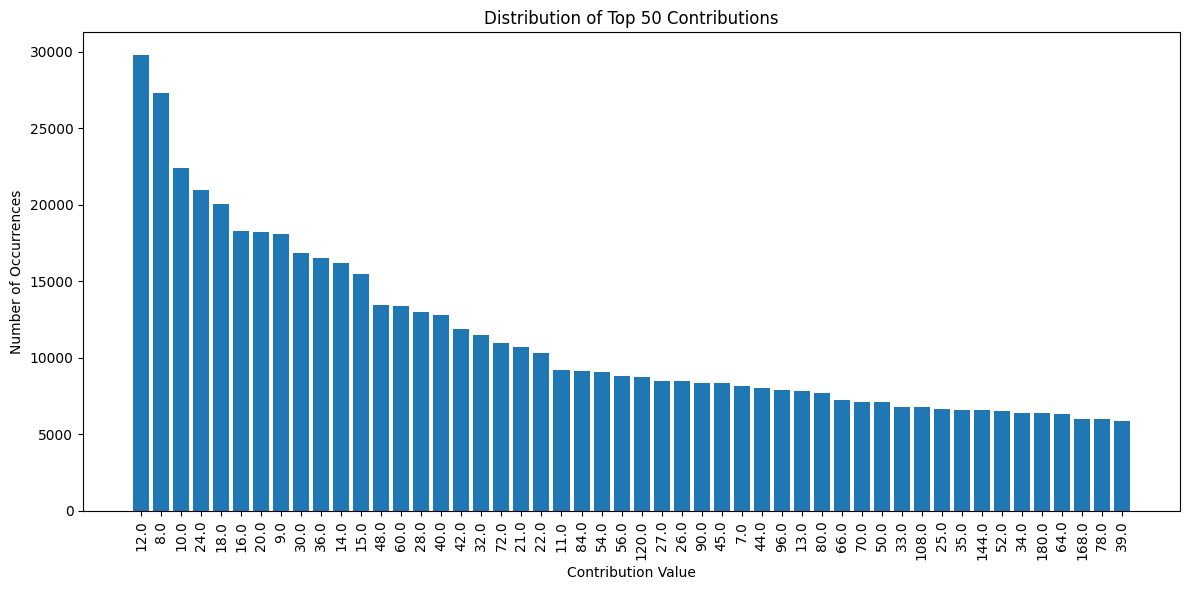

In [5]:
# Group by 'Contribution' and count occurrences
contribution_counts = df['Contribution'].value_counts().reset_index()
contribution_counts.columns = ['Contribution', 'Count']

# Sort in descending order of count
contribution_counts = contribution_counts.sort_values(by='Count', ascending=False)

# Take the top N contributions for better visualization if needed
top_n = 50 # You can adjust this number
contribution_counts_subset = contribution_counts.head(top_n)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(contribution_counts_subset['Contribution'].astype(str), contribution_counts_subset['Count'])
plt.xlabel('Contribution Value')
plt.ylabel('Number of Occurrences')
plt.title(f'Distribution of Top {top_n} Contributions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Contribution'])
plt.xlabel('Data Point (Row Index)')
plt.ylabel('Contribution')
plt.title('Contribution for Each Data Point')

# 3. Tidy up and display
plt.tight_layout()
plt.show()

Sample of the data:
   Unnamed: 0 type  layer class1       class2  Neuron_ID  Contribution
0           0  mlp      7   math  programming       6117  8.144039e+11
1           1  mlp     24   math  programming       9329  7.782393e+11
2           2  mlp     23   math  programming      10184  7.565522e+11
3           3  res      1   math  programming      12054  6.470184e+11
4           4  mlp     24   math  programming        282  5.486137e+11

Description of the data:
count    2.354851e+06
mean     1.500381e+07
std      1.637472e+09
min      1.000000e+00
25%      3.900000e+01
50%      2.780000e+02
75%      2.680000e+03
max      8.144039e+11
Name: Contribution, dtype: float64

Counts per bin (first 5):
Contribution
(-814403877.301, 16288077567.02]    2354433
(16288077567.02, 32576155133.04]        204
(32576155133.04, 48864232699.06]         79
(48864232699.06, 65152310265.08]         50
(65152310265.08, 81440387831.1]          19
Name: count, dtype: int64


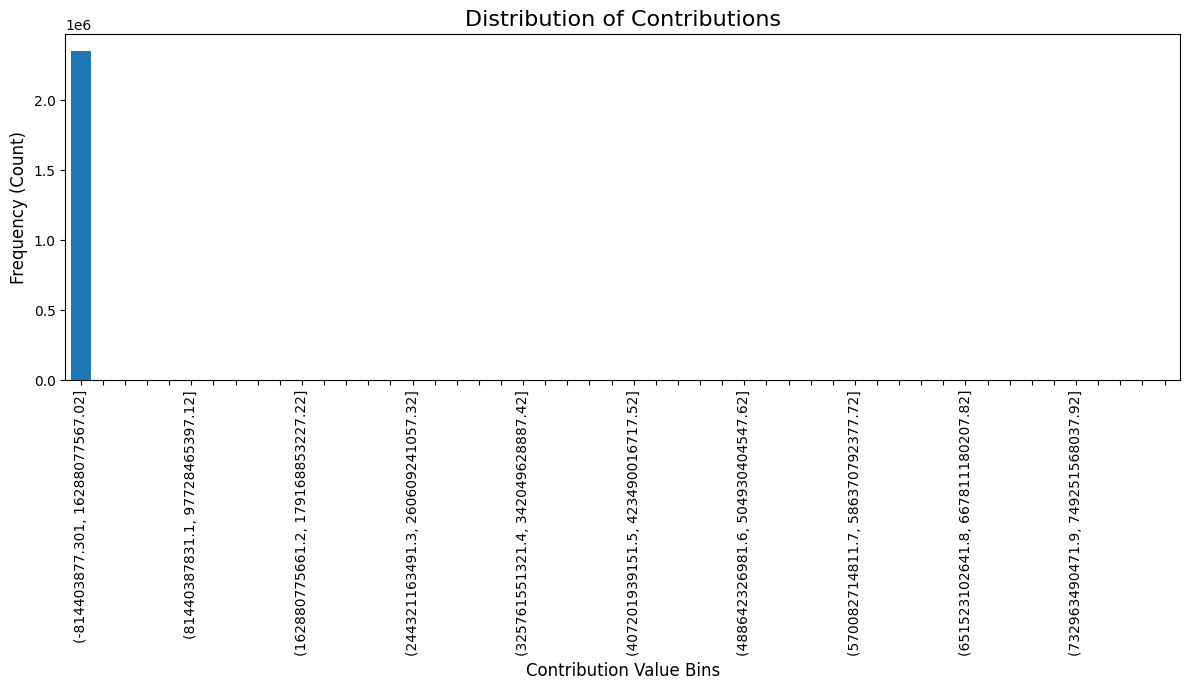

In [6]:

print("Sample of the data:")
print(df.head())
print(f"\nDescription of the data:\n{df['Contribution'].describe()}")


# --- 2. Group the Data into Bins ---
# We use pd.cut to segment the data. We'll create 50 bins.
# You can change the `bins` number to be higher or lower.
# A higher number gives more detail but can be noisy; a lower number gives a smoother overview.
binned_data = pd.cut(df['Contribution'], bins=50)


# --- 3. Count the Number of Points in Each Bin ---
# value_counts() counts the occurrences in each bin.
# sort_index() ensures the bins are plotted in the correct order from smallest to largest.
contribution_counts = binned_data.value_counts().sort_index()

print("\nCounts per bin (first 5):")
print(contribution_counts.head())


# --- 4. Create the Bar Plot ---
plt.figure(figsize=(12, 7)) # Create a larger figure to make the plot readable

# Create the bar plot directly from the counts
contribution_counts.plot(kind='bar', width=0.9)

# --- 5. Customize the Plot ---
plt.title('Distribution of Contributions', fontsize=16)
plt.xlabel('Contribution Value Bins', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability

# Make x-axis labels more readable by showing every 5th label
ax = plt.gca()
tick_labels = ax.get_xticklabels()
for i, label in enumerate(tick_labels):
    if i % 5 != 0:
        label.set_visible(False)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


Total number of unique contribution values: 160594

The 10 most common contribution values are:
Contribution
2.0     41915
4.0     36238
6.0     35321
1.0     34943
3.0     29885
12.0    29766
8.0     27306
10.0    22392
24.0    20957
18.0    20039
Name: count, dtype: int64


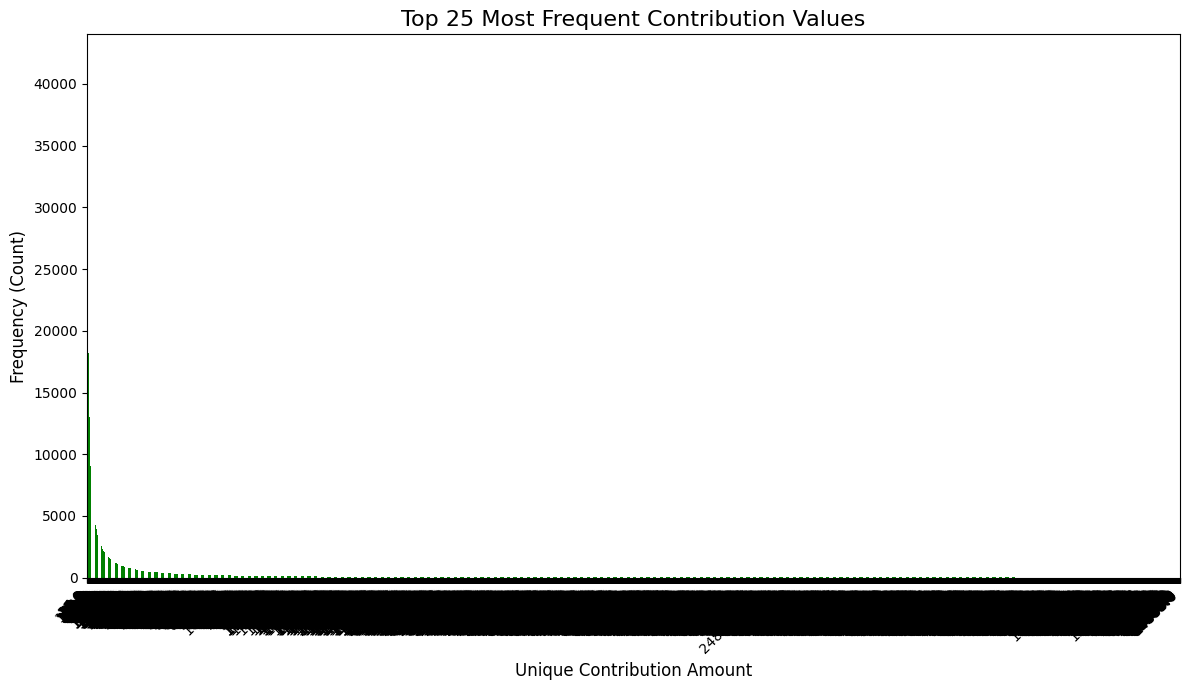

In [8]:

# --- 2. Get Counts of Unique Values ---
# .value_counts() automatically finds unique values and counts them,
# returning them sorted from most to least frequent.
unique_value_counts = df['Contribution'].value_counts()

print(f"Total number of unique contribution values: {len(unique_value_counts)}")
print("\nThe 10 most common contribution values are:")
print(unique_value_counts.head(10))

# --- 3. Select the Top 25 for Plotting ---
# We take the top 25 most frequent values to ensure the plot is readable.
top_25_contributions = unique_value_counts.head(10000)

# --- 4. Create the Bar Plot ---
plt.figure(figsize=(12, 7))
top_25_contributions.plot(kind='bar', color='green')

# --- 5. Customize the Plot ---
plt.title('Top 25 Most Frequent Contribution Values', fontsize=16)
plt.xlabel('Unique Contribution Amount', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better fit
plt.tight_layout()
plt.show()


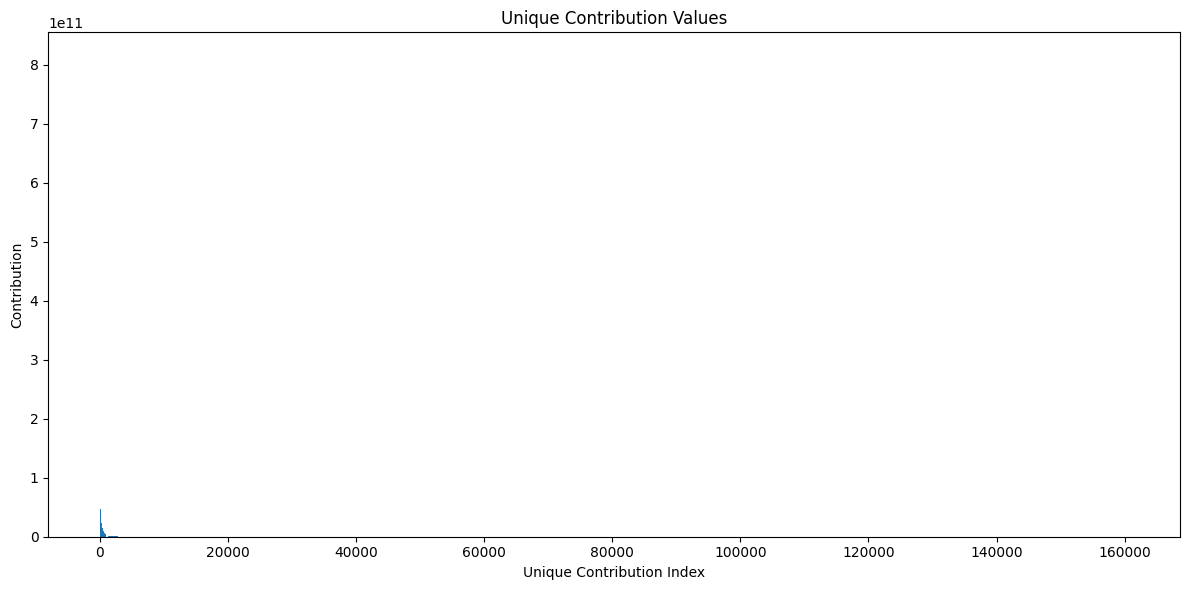

In [7]:
# 2. Extract unique contributions
unique_contributions = df['Contribution'].unique()

# 3. Plot each unique value
plt.figure(figsize=(12, 6))
plt.bar(range(len(unique_contributions)), unique_contributions)
plt.xlabel('Unique Contribution Index')
plt.ylabel('Contribution')
plt.title('Unique Contribution Values')
plt.tight_layout()
plt.show()

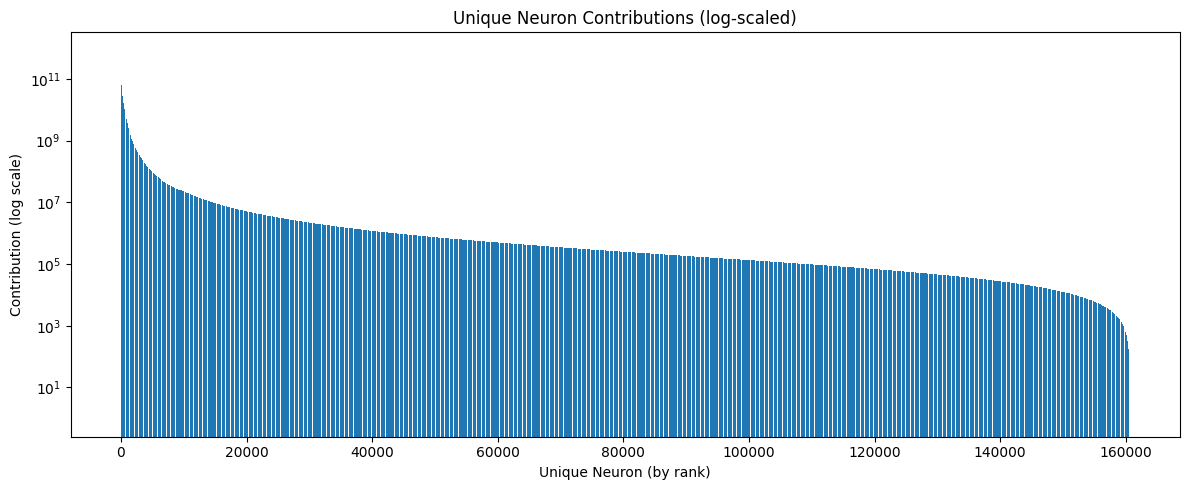

In [10]:
unique_contrib = (
    df["Contribution"]
      .drop_duplicates()
      .sort_values(ascending=False)
      .reset_index(drop=True)
)

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(unique_contrib.index, unique_contrib.values)
ax.set_yscale("log")                     # ← here!
ax.set_xlabel("Unique Neuron (by rank)")
ax.set_ylabel("Contribution (log scale)")
ax.set_title("Unique Neuron Contributions (log-scaled)")
plt.tight_layout()
plt.show()